In [163]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
ex3data1 = scipy.io.loadmat("./ex3data1.mat")
initX = ex3data1['X']
y = ex3data1['y'][:,0]
y[y==10] = 0
m, n = initX.shape
m, n

(5000, 400)

In [165]:
## Setup the parameters you will use for this exercise
numLabels = 10          # 10 labels, from 0 to 9

In [166]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def lrCostFunction(theta, X, y, lam):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = sum((-y * np.log(h)) - ((1-y)*np.log(1-h))) / m
    gradient = X.T.dot(h - y) / m

    regCost = (lam / (2.0 * m)) * np.sum(theta[1:] ** 2)
    regGradient = (lam / m) * theta
    regGradient[0] = 0

    return cost + regCost, gradient + regGradient

In [167]:
import matplotlib.image as mpimg

def displayData(X):
    fig, axis = plt.subplots(10,10,figsize=(8,8))
    for i in range(10):
        for j in range(10):
            axis[i,j].imshow(X[i*10+j,:].reshape(20,20,order="F"), cmap="hot")
            axis[i,j].axis("off")

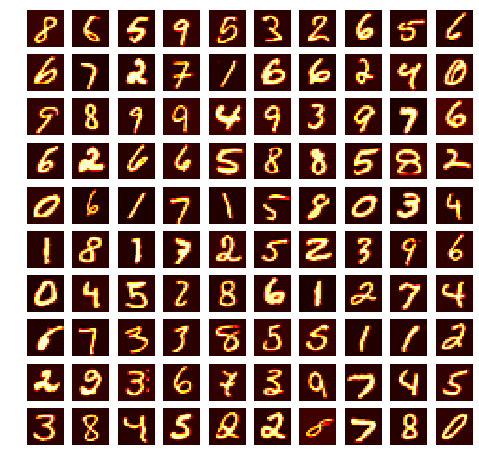

In [168]:
# Randomly select 100 data points to display
randIndices = np.random.permutation(m)
sel = initX[randIndices[:100],:]

displayData(sel)

In [169]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = lrCostFunction(theta_t, X_t, y_t, 3)

print("Cost:",J,"Expected cost: 2.534819\n")
print("Gradients:\n",grad,"\n\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: [2.5348194] Expected cost: 2.534819

Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 

Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [170]:
from scipy import optimize

def oneVsAll(X, y, numLabels, lam):
    n = X.shape[1]
    allTheta = np.zeros((numLabels, n))
    for c in range(0, numLabels):
        initialTheta = np.zeros(n)
        target = np.vectorize(int)(y == c)
        result = optimize.minimize(
            lrCostFunction,
            initialTheta,
            args=(X, target, lam),
            method='CG',
            jac=True,
            options={
                'maxiter': 50,
                'disp': False,
            }
        )
        theta = result.x
        cost = result.fun
        print('Training theta for label %d | cost: %f' % (c, cost))
        allTheta[c, :] = theta
    return allTheta

In [171]:
X = np.hstack((np.ones((m,1)), initX))
theta = oneVsAll(X, y, numLabels, 1)

Training theta for label 0 | cost: 0.020151
Training theta for label 1 | cost: 0.026967
Training theta for label 2 | cost: 0.068630
Training theta for label 3 | cost: 0.071816
Training theta for label 4 | cost: 0.052088
Training theta for label 5 | cost: 0.077158
Training theta for label 6 | cost: 0.034827
Training theta for label 7 | cost: 0.046841
Training theta for label 8 | cost: 0.093192
Training theta for label 9 | cost: 0.089673


In [172]:
def predictOneVsAll(theta, X):
    return np.argmax(sigmoid(X.dot(theta.T)), axis=1)

In [176]:
p = predictOneVsAll(theta, X)

accuracy = 100 * np.mean(p == y)
print('accuracy = %0.2f%%' % accuracy)

accuracy = 94.32%
